In [98]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import signal
import numpy as np
import torch

from src.pipeline.repository import Repository


In [99]:
sr = 25
len_respi = 91
#len_respi = 180

def plot_sftf(data):
    amp = 2*np.sqrt(2)
    f1, t1, Zxx1 = signal.stft(data, sr, nperseg=len_respi)
    plt.pcolormesh(t1, f1, np.abs(Zxx1), vmin=0, vmax=amp, shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

def plot_fft(data):
    N = len(data)
    T = 1.0 / sr
    fft1 = np.fft.fft(data)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2/N * np.abs(fft1[:N//2]))
    plt.show()

In [100]:
data_repo_path = os.path.join('..', 'data', 'repository')
repo = Repository(data_repo_path)

# RAW Dataset

In [101]:
raw_dataset = repo.load_dataset('5d91f31f-b880-41d6-b5fe-fd15ebb15e20', 'numpy')

In [102]:
print('Nombre de session :', len(raw_dataset))

Nombre de session : 999


In [103]:
x1, y1 = raw_dataset[0]
print(x1.shape)
print(y1.shape)

(441000, 1)
(441000, 1)


In [104]:
x1f = x1.flatten()
y1f = y1.flatten()
print(x1f.shape)
print(y1f.shape)

(441000,)
(441000,)


In [105]:
print('longueur (point)', len(x1), 'longueur (min):', len(x1)*40/1000/60)

longueur (point) 441000 longueur (min): 294.0


<Axes: >

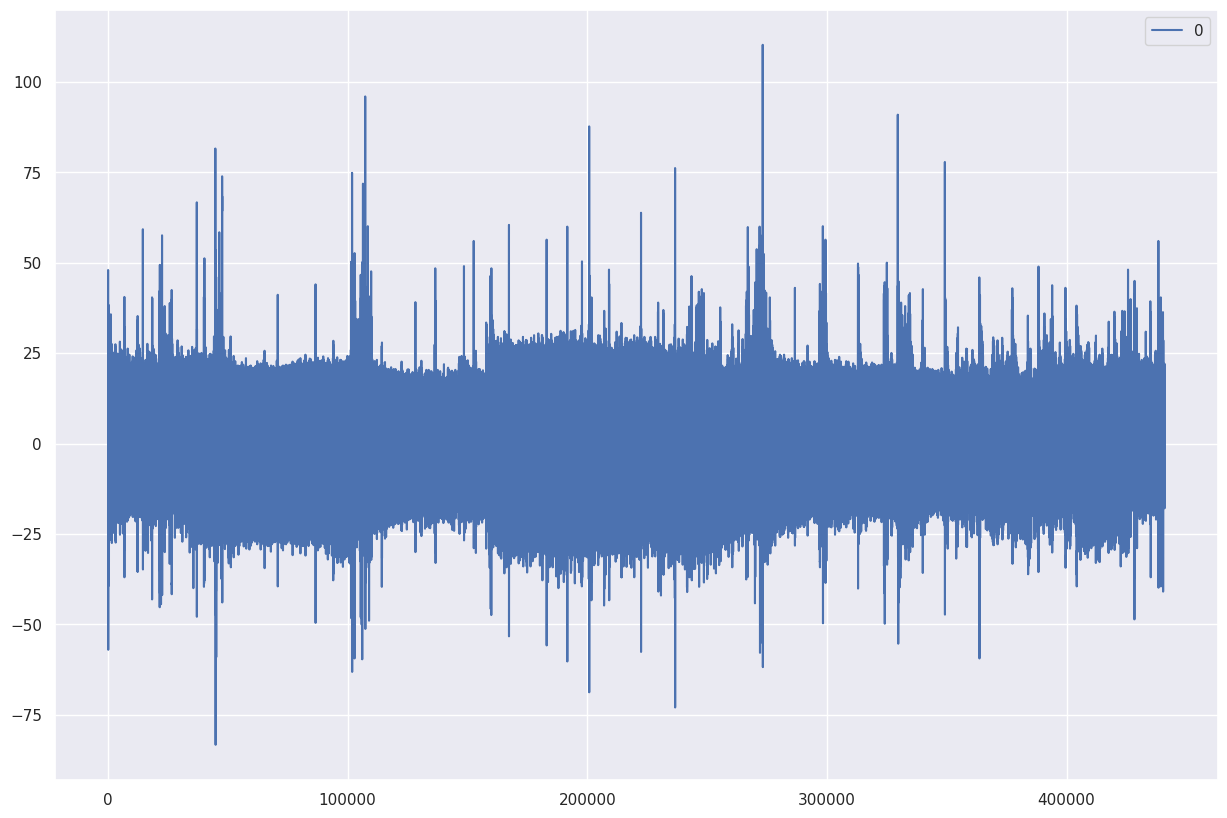

In [106]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x1)

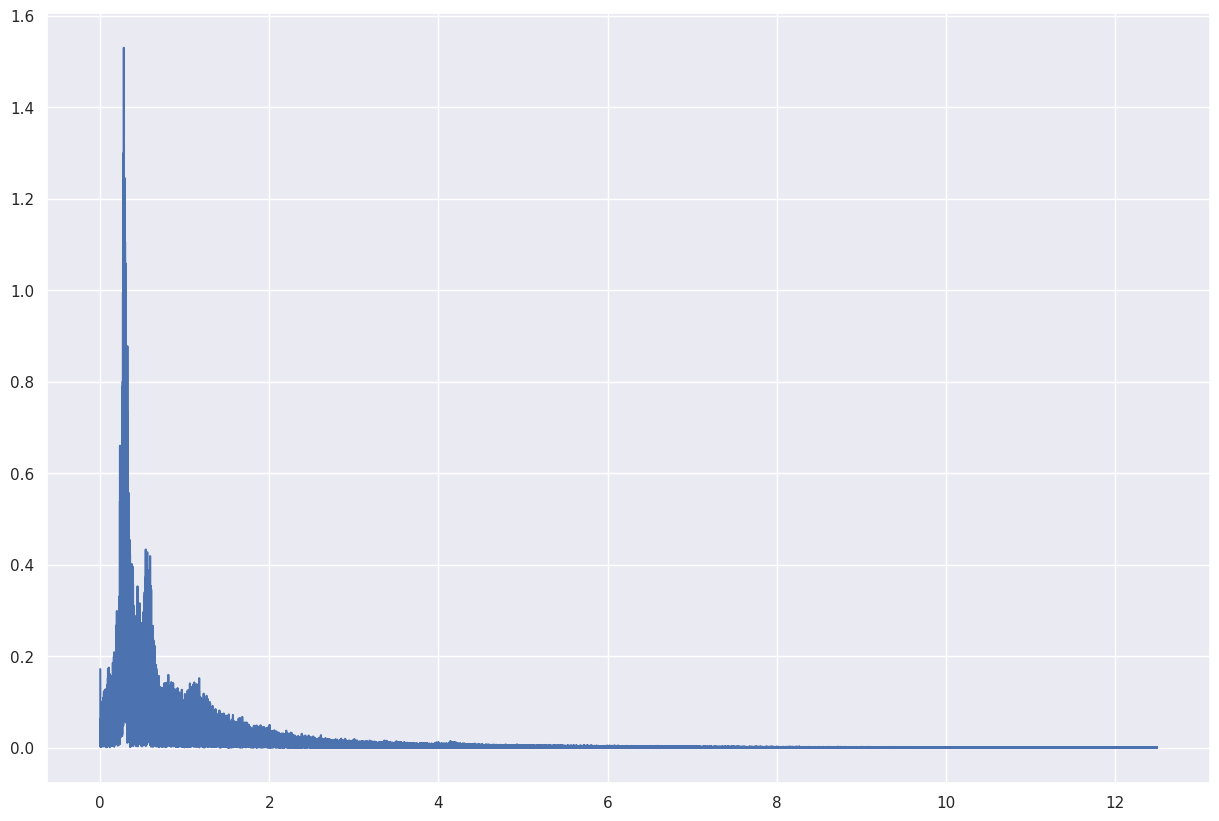

In [107]:
# FFT
plot_fft(x1f)

In [108]:
idx_max = np.argmax(fft1)
print('frequence respiration', xf[idx_max])
print('Longueur respiration plus frequente', 1/xf[idx_max], 's')

frequence respiration 0.27375407598220397
Longueur respiration plus frequente 3.652913646717747 s


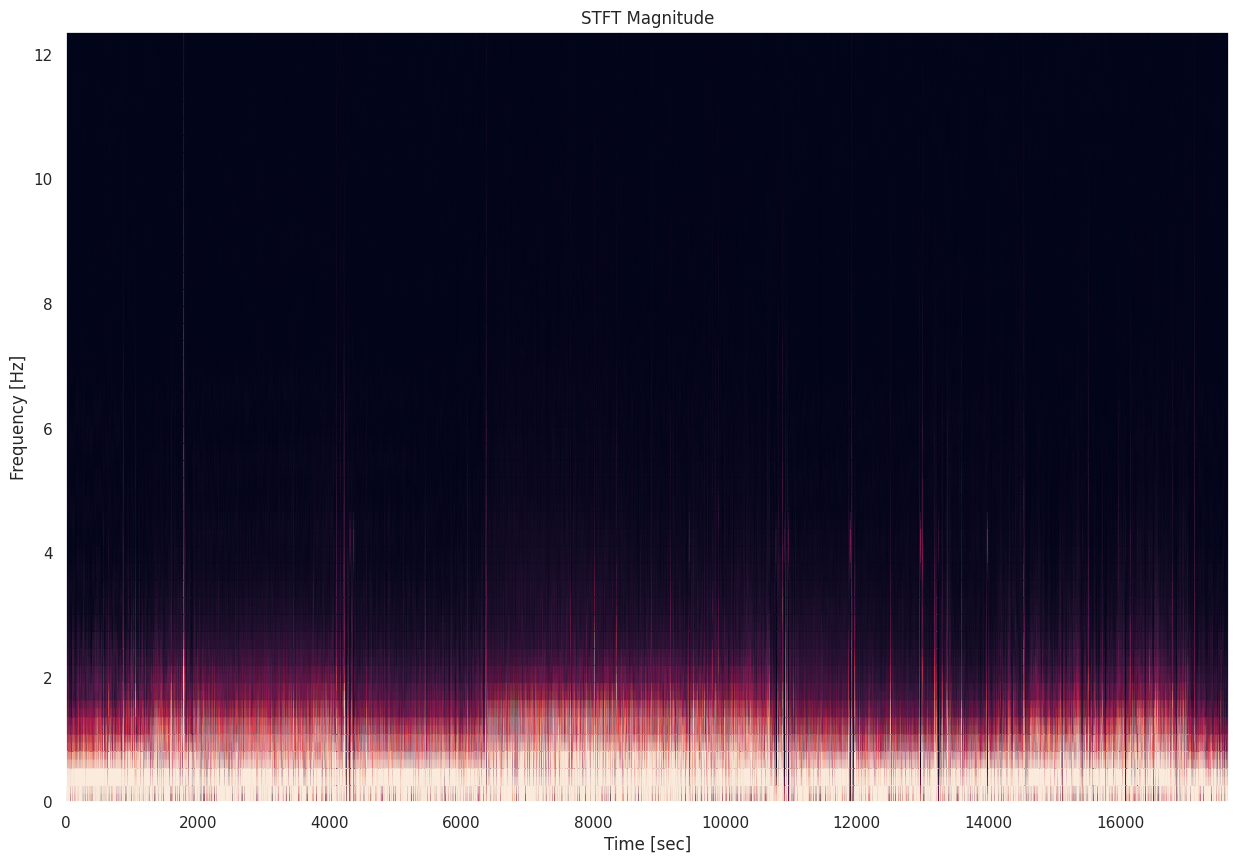

In [109]:
# STFT
plot_sftf(x1f)


# Processed Dataset (windowed)

In [110]:
windowed_dataset = repo.load_dataset('d78f6ce8-04a9-40dd-a5e7-de75878363e9', 'numpy')

In [111]:
print('nombre d''elements:', len(windowed_dataset))

nombre delements: 603126


In [112]:
x2, y2 = windowed_dataset[0]
x2

array([[ 19.32000077],
       [ 18.84000075],
       [ 18.00000072],
       [ 16.32000065],
       [ 13.68000054],
       [  9.48000038],
       [  3.72000015],
       [ -3.72000015],
       [-14.28000057],
       [-25.68000102],
       [-27.7200011 ],
       [-28.08000112],
       [-28.44000113],
       [-28.32000113],
       [-27.6000011 ],
       [-26.40000105],
       [-25.080001  ],
       [-23.04000092],
       [-20.88000083],
       [-19.20000076],
       [-17.88000071],
       [-17.16000068],
       [-16.20000064],
       [-15.24000061],
       [-15.1200006 ],
       [-14.40000057],
       [-13.56000054],
       [-12.4800005 ],
       [-11.52000046],
       [-11.16000044],
       [-10.32000041],
       [ -9.60000038],
       [ -9.24000037],
       [ -8.64000034],
       [ -7.80000031],
       [ -6.96000028],
       [ -6.00000024],
       [ -4.68000019],
       [ -2.6400001 ],
       [  0.72000003],
       [  4.80000019],
       [  9.00000036],
       [ 12.6000005 ],
       [ 15

<Axes: >

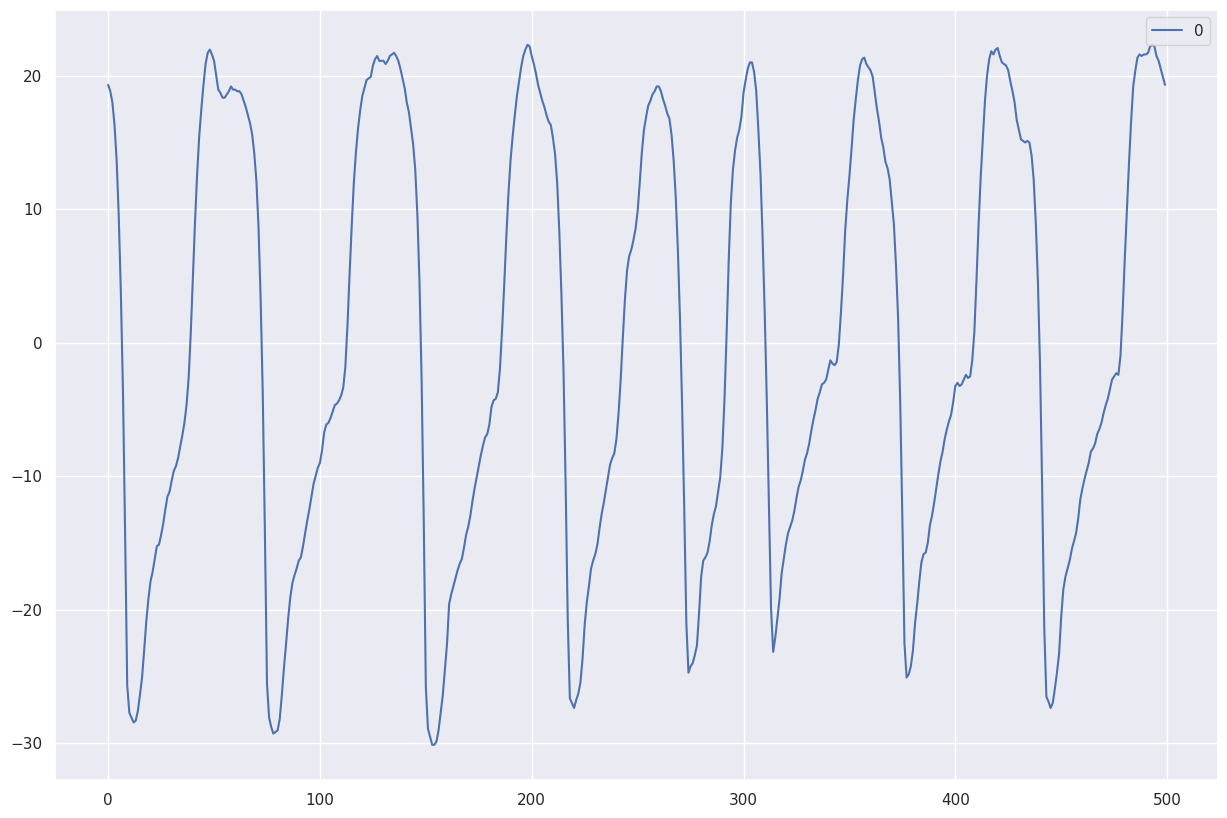

In [113]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x2)

In [114]:
x2f = x2.flatten()
y2f = y2.flatten()
print(x2f.shape)
print(y2f.shape)

(500,)
(500,)


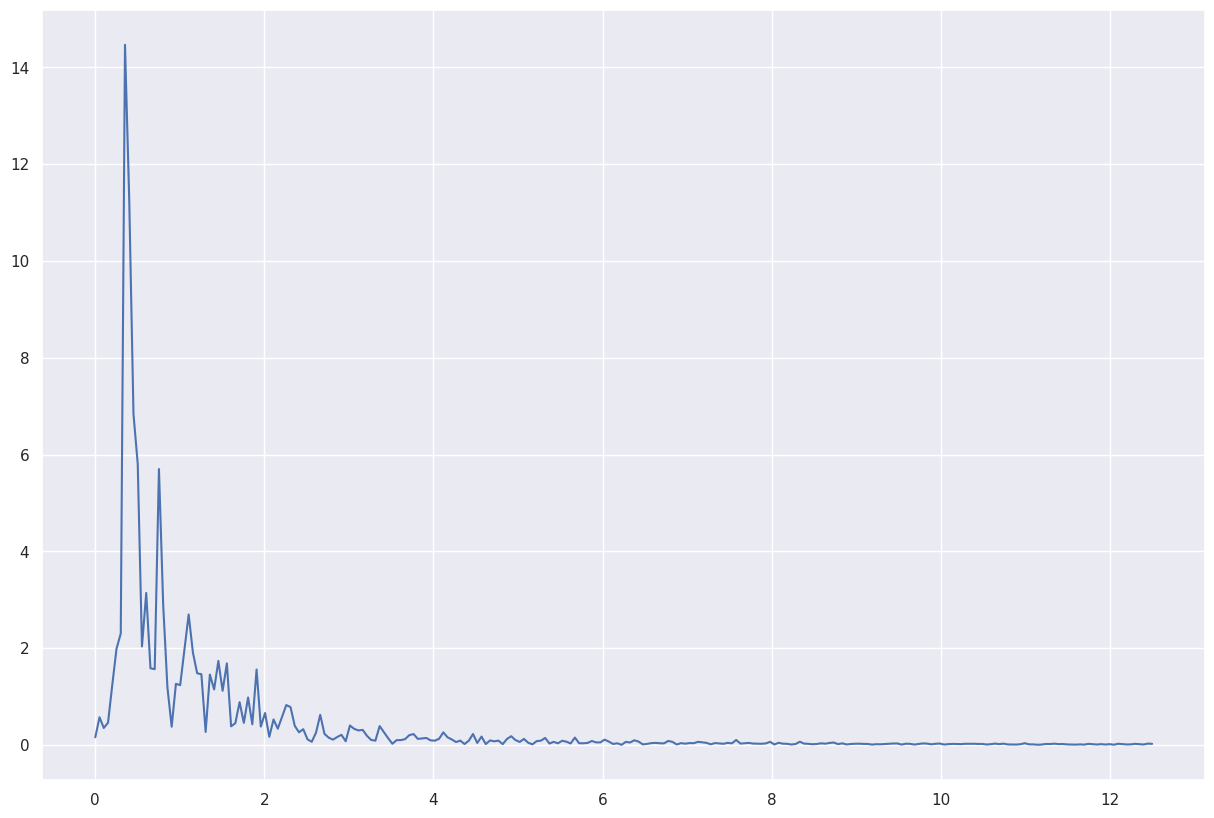

In [115]:
plot_fft(x2f)

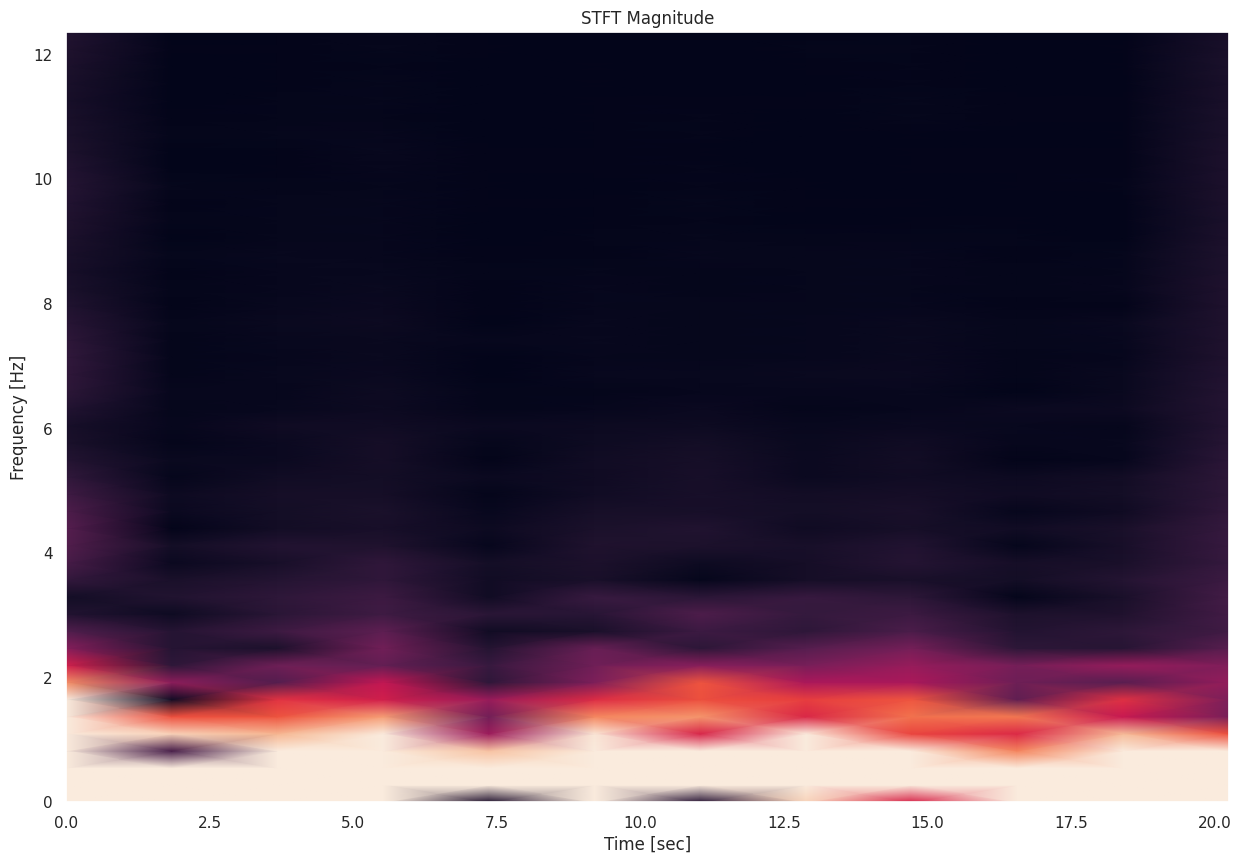

In [116]:
plot_sftf(x2f)

In [117]:
# find one with apnea event
index_dataset = {}
list_df_annot = []
res = None
with tqdm(total=len(windowed_dataset)) as pbar:
    for x,y in windowed_dataset:
        if 1 in y:
            list_df_annot.append((x,y))
            res = (x,y)
            break
        pbar.update(1)

  0%|          | 0/603126 [00:00<?, ?it/s]

<Axes: >

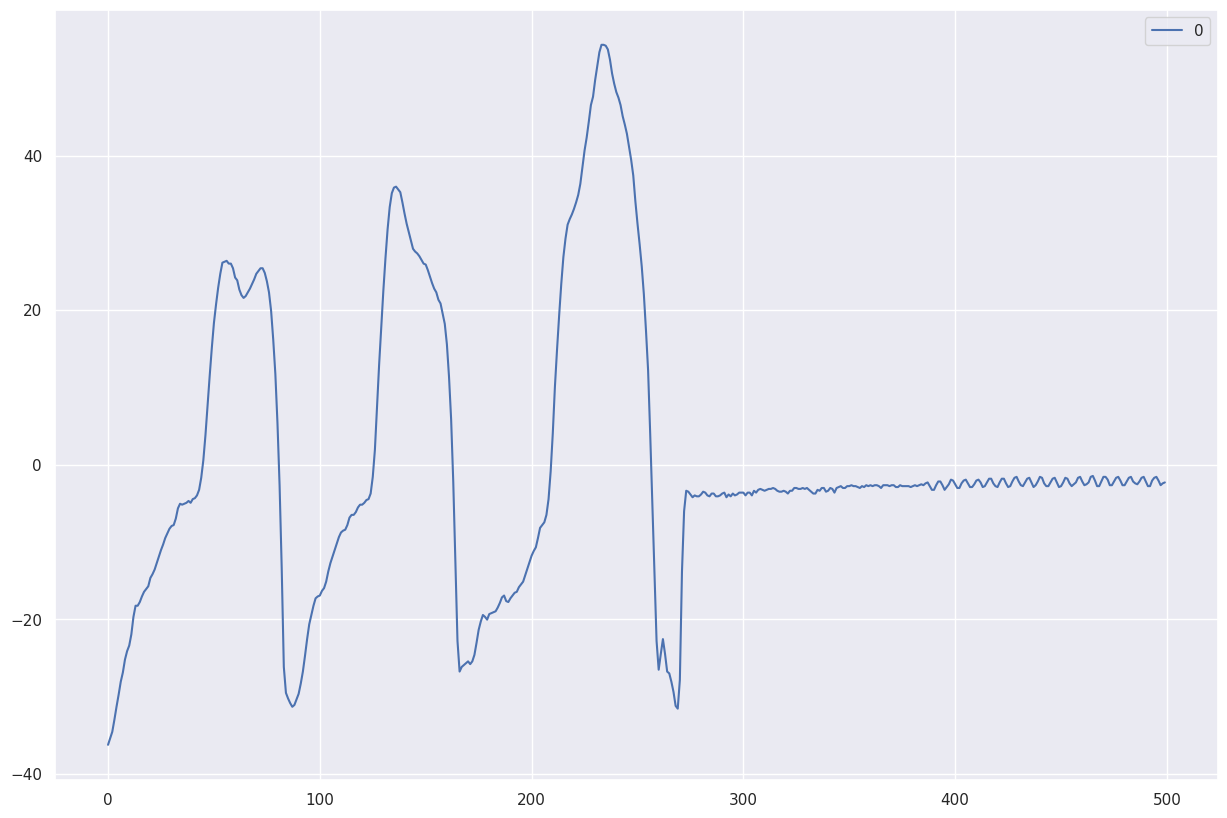

In [118]:
(x3, y3) = res
sns.lineplot(x3)

In [119]:
x3f = x3.flatten()
y3f = y3.flatten()

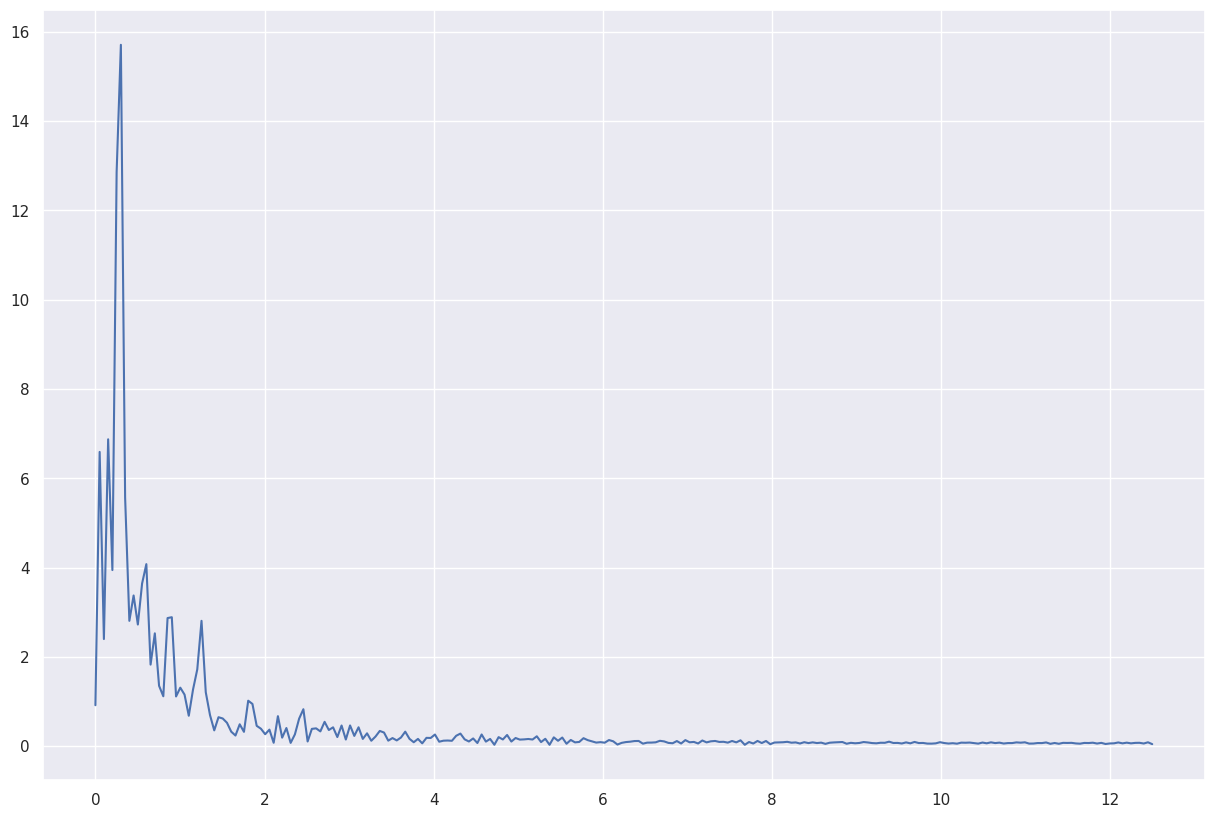

In [120]:
plot_fft(x3f)

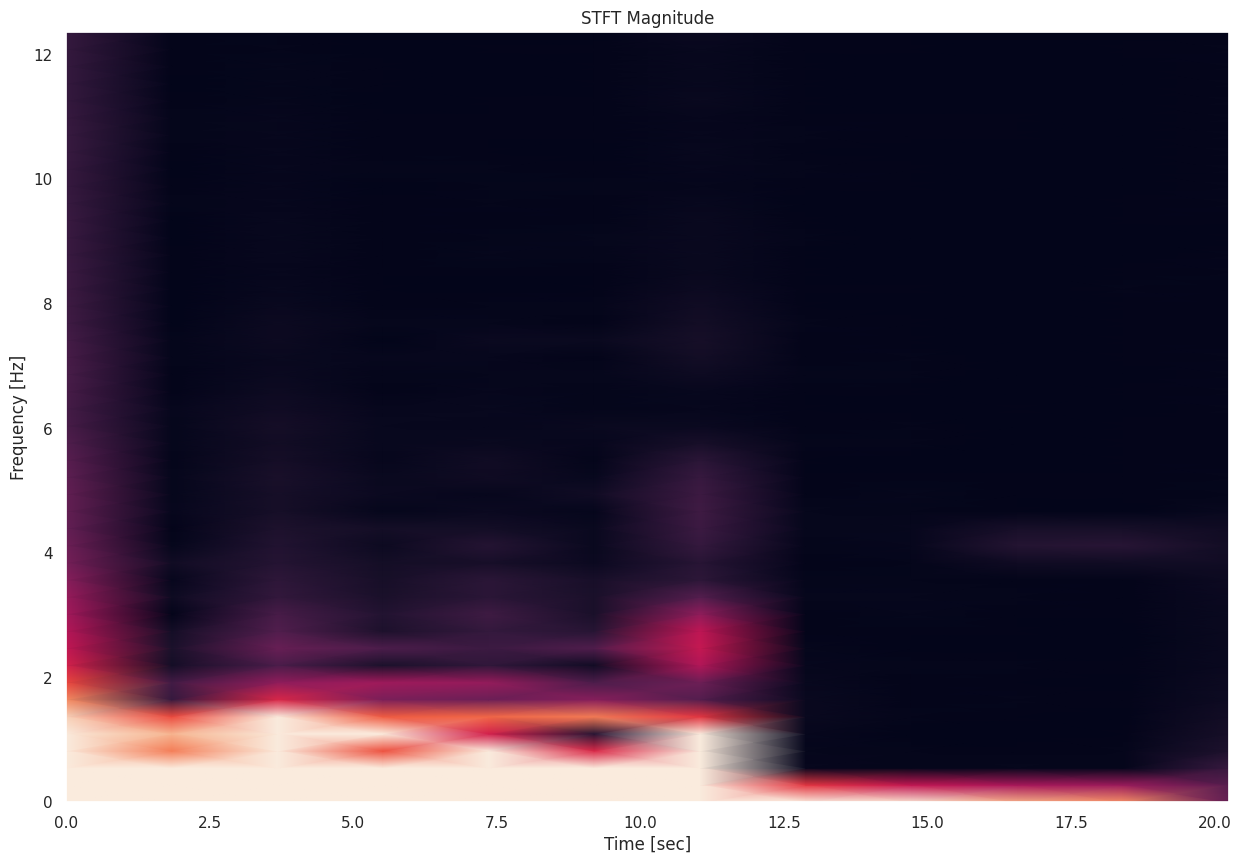

In [121]:
plot_sftf(x3f)